# Logistic Regression Tutorial

### Question 1

Define two 2D Gaussian distributions: one with centre at (1;-1) and the other at (-1; 1). Let them
both have variances of 1 in each dimension. We'll treat these as the generators of data from classes
0 and 1 respectively.

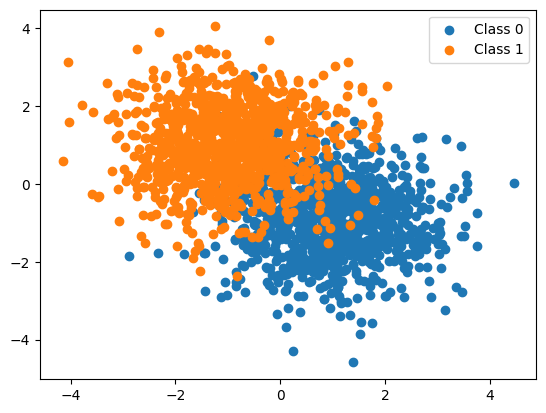

In [26]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np

# Define the mean vectors and covariance matrices
mu_0 = np.array([1, -1])
mu_1 = np.array([-1, 1])
cov = np.array([[1, 0], [0, 1]])

# Generate data from the distributions
data_b0 = np.random.multivariate_normal(mu_0, cov, 1000)
data_b1 = np.random.multivariate_normal(mu_1, cov, 1000)


plt.scatter(data_b0[:,0], data_b0[:,1], label='Class 0')
plt.scatter(data_b1[:,0], data_b1[:,1], label='Class 1')
plt.legend()
plt.show()


Draw 20 data points from each distribution (use the randn function in Matlab or Python). Plot the
points from each class in a different colour. How easily separable are these classes?

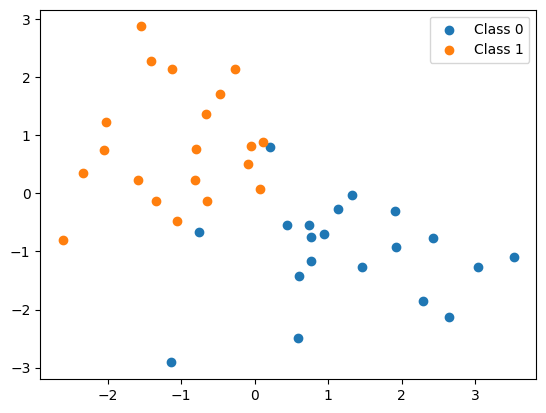

In [27]:
arr_b0 = np.random.choice(data_b0.shape[0], size=20, replace=False)
arr_b1 = np.random.choice(data_b1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_b_0 = np.random.choice(arr_b0, size=20, replace=False)
data_b_1 = np.random.choice(arr_b1, size=20, replace=False)

data_b0 = data_b0[data_b_0, :]
data_b1 = data_b1[data_b_1, :]

# Plot the data
plt.scatter(data_b0[:, 0], data_b0[:, 1], label='Class 0')
plt.scatter(data_b1[:, 0], data_b1[:, 1], label='Class 1')
plt.legend()
plt.show()


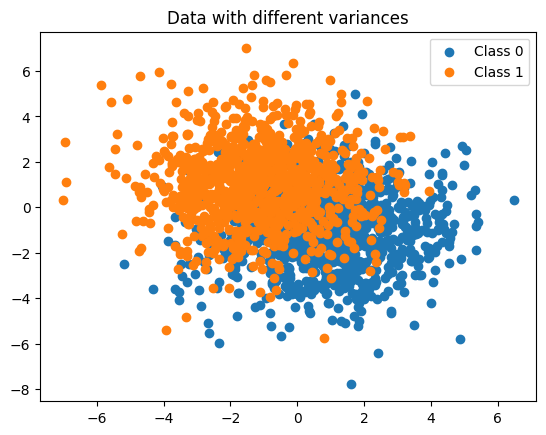

In [28]:
# Define the mean vectors and covariance matrices
mu_0 = np.array([1, -1])
mu_1 = np.array([-1, 1])
cov = np.array([[3, 0], [0, 3]])

# Generate data from the distributions
data_c0 = np.random.multivariate_normal(mu_0, cov, 1000)
data_c1 = np.random.multivariate_normal(mu_1, cov, 1000)

plt.scatter(data_c0[:,0], data_c0[:,1], label='Class 0')
plt.scatter(data_c1[:,0], data_c1[:,1], label='Class 1')
plt.legend()
plt.title('Data with different variances')
plt.show()

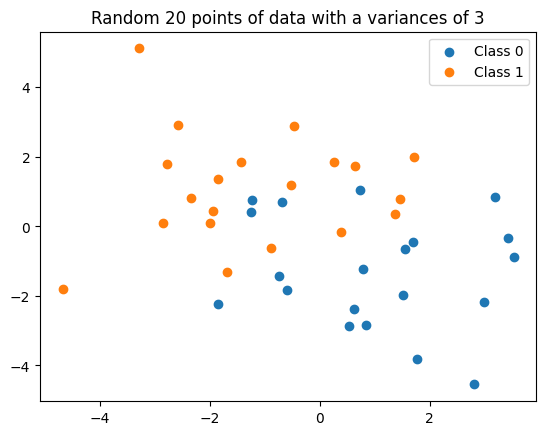

In [29]:
arr_c0 = np.random.choice(data_c0.shape[0], size=20, replace=False)
arr_c1 = np.random.choice(data_c1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_c_0 = np.random.choice(arr_c0, size=20, replace=False)
data_c_1 = np.random.choice(arr_c1, size=20, replace=False)

data_c0 = data_c0[data_c_0, :]
data_c1 = data_c1[data_c_1, :]


# Plot the data
plt.scatter(data_c0[:, 0], data_c0[:, 1], label='Class 0')
plt.scatter(data_c1[:, 0], data_c1[:, 1], label='Class 1')
plt.title('Random 20 points of data with a variances of 3')
plt.legend()
plt.show()

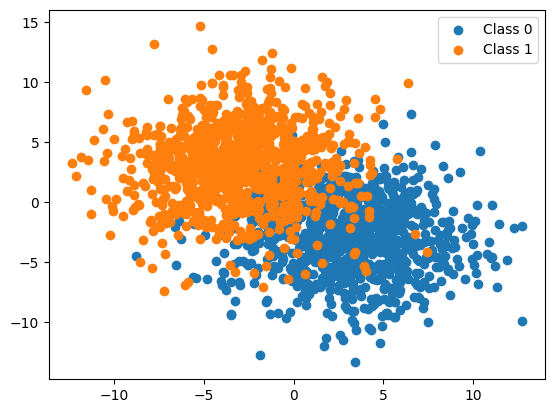

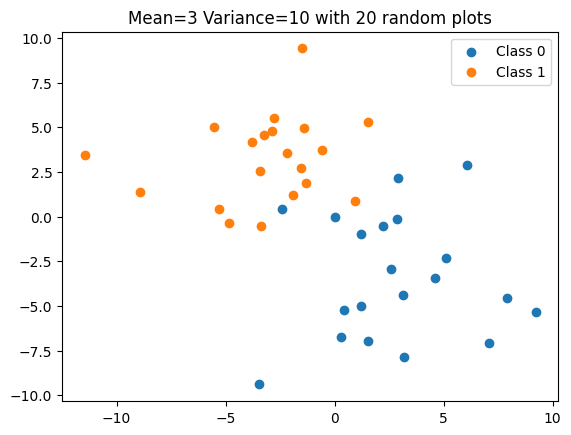

In [30]:
# Define the mean vectors and covariance matrices
mu_0 = np.array([3, -3])
mu_1 = np.array([-3, 3])
cov = np.array([[10, 0], [0, 10]])

# Generate data from the distributions
data_d0 = np.random.multivariate_normal(mu_0, cov, 1000)
data_d1 = np.random.multivariate_normal(mu_1, cov, 1000)

plt.scatter(data_d0[:,0], data_d0[:,1], label='Class 0')
plt.scatter(data_d1[:,0], data_d1[:,1], label='Class 1')

plt.legend()
plt.show()

# Generate 20 data points from each distribution
arr_d0 = np.random.choice(data_d0.shape[0], size=20, replace=False)
arr_d1 = np.random.choice(data_d1.shape[0], size=20, replace=False)

# Generate 20 data points from each distribution
data_d_0 = np.random.choice(arr_d0, size=20, replace=False)
data_d_1 = np.random.choice(arr_d1, size=20, replace=False)

data_d0 = data_d0[data_d_0, :]
data_d1 = data_d1[data_d_1, :]

# Plot the data
plt.scatter(data_d0[:, 0], data_d0[:, 1], label='Class 0')
plt.scatter(data_d1[:, 0], data_d1[:, 1], label='Class 1')
plt.title('Mean=3 Variance=10 with 20 random plots')
plt.legend()
plt.show()

In [31]:
# The loweer the covariance, the more spread out the data is
# The higher the covariance, the more clustered the data is
# Its easier to classify data when the varince is low

# In general, it is easier to classify data when the variance is lower. 
#When the variance is higher, the data points are more spread out and 
#there is more overlap between the classes, which can make it more difficult to 
#distinguish between them. This is because the distributions have fatter tails and 
#are more likely to produce outliers that are difficult to classify.

# In the specific case of the two 2D Gaussian distributions we defined earlier, 
#we saw that when the variance was lower (1 in each dimension), the two classes were easily 
#separable with a linear classifier. When the variance was higher (3 in each dimension), 
#the classes were less well-separated and there was more overlap between them, making classification more difficult.

# However, it is important to note that this is not always the case. 
#There may be situations where higher variance leads to more distinguishable classes, 
#such as when the classes have different variances or when the distributions are non-Gaussian. 
#Ultimately, the ease of classification depends on the specific properties of the data and the classifier being use

# Q2

a)

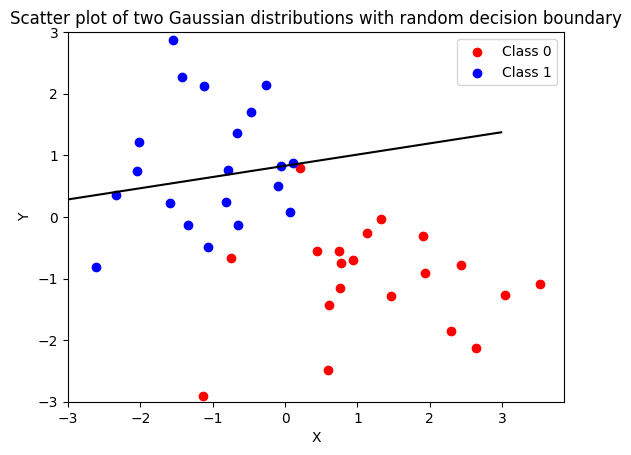

In [32]:
# Concatenate the bias term with the input data
X = np.concatenate((np.ones((40, 2)), np.concatenate((data_b0, data_b1))))

# Assign class labels to the data
y = np.concatenate((np.zeros(20), np.ones(20)))

# Randomly initialize the model's parameters
theta = np.random.rand(3) - 0.5

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define a grid of points over the input space to plot the decision boundary
x1_range = np.linspace(-3, 3, 100)
x2_range = np.linspace(-3, 3, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
input_grid = np.c_[x1_grid.ravel(), x2_grid.ravel(), np.ones((x1_grid.size, 1))]
predicted_labels = sigmoid(np.dot(input_grid, theta)).reshape(x1_grid.shape)

# Plot the decision boundary
plt.contour(x1_grid, x2_grid, predicted_labels, levels=[0.5], colors='black')
plt.scatter(data_b0[:, 0], data_b0[:, 1], color='red', label='Class 0')
plt.scatter(data_b1[:, 0], data_b1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('Scatter plot of two Gaussian distributions with random decision boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

b)

In [33]:
# Calculate the predictions for each data point
X = np.hstack((np.ones((40, 1)), np.vstack((data_b0, data_b1))))
y = np.vstack((np.zeros((20, 1)), np.ones((20, 1))))
predictions = 1 / (1 + np.exp(-np.dot(X, theta)))

# Calculate the log-likelihood error function
log_likelihood = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
error = log_likelihood / len(X)
print(f'Error of random classifier: {error:.2f}')

# Calculate the predicted labels for the input data
# predicted_labels = sigmoid(np.dot(X, theta))

# # Calculate the log-likelihood error
# N = len(y)
# E = -1/N * np.sum(y * np.log(predicted_labels) + (1 - y) * np.log(1 - predicted_labels))

# print(f'Log-likelihood error: {E:.3f}')

# # Define the threshold value
# threshold = 0.5

# # Calculate the predicted labels using the threshold value
# predicted_labels

Error of random classifier: 33.28


c)

In [34]:
# Define the learning rate
learning_rate = 0.01

# Perform one iteration of gradient descent to update the weights
for i in range(len(X)):
    prediction = 1 / (1 + np.exp(-np.dot(X[i], theta)))
    error = y[i] - prediction
    theta += learning_rate * error * np.hstack(([1], X[i, 1:]))

d)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# # Define data
# mu1 = [1, -1]
# cov1 = [[1, 0], [0, 1]]
# mu2 = [-1, 1]
# cov2 = [[1, 0], [0, 1]]
# data_0b = np.random.multivariate_normal(mu1, cov1, 20)
# class1_data = np.random.multivariate_normal(mu2, cov2, 20)

# # Define initial parameters
# theta = np.random.uniform(-0.5, 0.5, size=3)

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define prediction function
def predict(x, theta):
    x_augmented = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return sigmoid(x_augmented @ theta)

# Define cost function
def cost(x, y, theta):
    y_pred = predict(x, theta)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Choose two data points (one from each class)
x = np.concatenate((data_b0[0, :], data_b1[0, :]))
y = np.array([0, 1])

# Define learning rate
alpha = 0.01

# Compute gradient for two data points
x_augmented = np.concatenate(([1], x))
grad = (predict(x.reshape(1, -1), theta) - y) * x_augmented

# Perform weight update for two data points
theta -= alpha * grad

print(theta)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

e)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# # Define two Gaussian distributions
# mu1 = np.array([1, -1])
# cov1 = np.eye(2)
# mu2 = np.array([-1, 1])
# cov2 = np.eye(2)

# # Generate dataset
# class0_data = np.random.multivariate_normal(mu1, cov1, 20)
# class1_data = np.random.multivariate_normal(mu2, cov2, 20)

# Initialize the parameters
theta = np.random.rand(3) - 0.5

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define prediction function
def predict(x, theta):
    z = np.dot(x, theta[1:]) + theta[0]
    return sigmoid(z)

# Define the error function
def error(x, y, theta):
    y_pred = predict(x, theta)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Define the learning rate and number of iterations
alpha = 0.01
max_iterations = 1000

# Train the model
for i in range(max_iterations):
    # Cycle through all training datapoints and update the parameters
    for j in range(len(data_0b)):
        x = np.hstack(([1], data_0b[j]))
        y = 0
        gradient = (predict(x, theta) - y) * x
        theta -= alpha * gradient
    
    for j in range(len(data_1b)):
        x = np.hstack(([1], data_1b[j]))
        y = 1
        gradient = (predict(x, theta) - y) * x
        theta -= alpha * gradient
    
    # Plot the decision boundary
    if i % 100 == 0:
        plt.scatter(data_0b[:, 0], data_0b[:, 1], c='r')
        plt.scatter(data_1b[:, 0], data_1b[:, 1], c='b')
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
        x_vals = np.array([-4, 4])
        y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
        plt.plot(x_vals, y_vals, '--')
        plt.show()

# Plot the final decision boundary
plt.scatter(data_0b[:, 0], data_0b[:, 1], c='r')
plt.scatter(data_1b[:, 0], data_1b[:, 1], c='b')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
x_vals = np.array([-4, 4])
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
plt.plot(x_vals, y_vals, '--')
plt.show()

# Calculate the error
class0_preds = predict(np.hstack((np.ones((20, 1)), data_0b)), theta)
class1_preds = predict(np.hstack((np.ones((20, 1)), data_1b)), theta)
error = (np.sum(class0_preds < 0.5) + np.sum(class1_preds >= 0.5)) / 40
print("Error:", error)

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

f)

In [ ]:
# Set up initial parameter values
theta = np.random.uniform(low=-0.5, high=0.5, size=3)

# Define hyperparameters
alpha = 0.01
epsilon = 0.05
max_iterations = 1000

# Initialize variables for loop
norm_diff = np.inf
iteration = 0

while norm_diff > epsilon and iteration < max_iterations:
    # Keep track of old parameters for norm difference calculation
    old_theta = theta.copy()
    
    # Calculate gradients for each parameter
    grad_theta0 = 0
    grad_theta1 = 0
    grad_theta2 = 0
    for i in range(len(X)):
        grad_theta0 += (sigmoid(theta, X[i]) - y[i]) * X[i][0]
        grad_theta1 += (sigmoid(theta, X[i]) - y[i]) * X[i][1]
        grad_theta2 += (sigmoid(theta, X[i]) - y[i]) * X[i][2]
    
    # Update parameters
    theta[0] -= alpha * grad_theta0
    theta[1] -= alpha * grad_theta1
    theta[2] -= alpha * grad_theta2
    
    # Calculate norm difference between old and new parameters
    norm_diff = np.linalg.norm(theta - old_theta)
    
    # Increment iteration counter
    iteration += 1

# Plot decision boundary
x1 = np.linspace(-4, 4, 100)
x2 = (-theta[0] - theta[1]*x1) / theta[2]
plt.plot(x1, x2, color='black')

# Plot data points
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='red', label='Class 0')
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

# Show plot
plt.show()

# Calculate error on training data
y_pred = np.array([predict(theta, x) for x in X])
log_likelihood_error = np.sum(y*np.log(sigmoid(theta, X)) + (1-y)*np.log(1 - sigmoid(theta, X)))
confusion_matrix = np.array([[np.sum((y==0) & (y_pred==0)), np.sum((y==0) & (y_pred==1))],
                             [np.sum((y==1) & (y_pred==0)), np.sum((y==1) & (y_pred==1))]])
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / np.sum(confusion_matrix)

print('Log-likelihood error:', log_likelihood_error)
print('Confusion matrix:\n', confusion_matrix)
print('Accuracy:', accuracy)

g)

In [ ]:
# Generate 20 more data points for each class
class0_val = np.random.multivariate_normal(mu1, cov1, 20)
class1_val = np.random.multivariate_normal(mu2, cov2, 20)

# Classify validation data using the trained model
val_predictions = predict(class0_val, class1_val, weights)

# Generate the confusion matrix for validation data
conf_matrix_val = confusion_matrix(np.concatenate((np.zeros(20), np.ones(20))), val_predictions)

print("Confusion matrix for validation data:")
print(conf_matrix_val)

# Calculate the error on the validation data
val_error = log_likelihood_error(class0_val, class1_val, weights)
print("Log-likelihood error on validation data:", val_error)

h)

In [ ]:
# Define different hyperparameters to test
learning_rates = [0.001, 0.01, 0.1]
termination_thresholds = [0.01, 0.05, 0.1]

for alpha in learning_rates:
    for epsilon in termination_thresholds:
        # Train the model using the given hyperparameters
        weights = logistic_regression(class0_data, class1_data, alpha, epsilon)
        
        # Classify validation data using the trained model
        val_predictions = predict(class0_val, class1_val, weights)
        
        # Generate the confusion matrix for validation data
        conf_matrix_val = confusion_matrix(np.concatenate((np.zeros(20), np.ones(20))), val_predictions)

        print(f"Hyperparameters: alpha={alpha}, epsilon={epsilon}")
        print("Confusion matrix for validation data:")
        print(conf_matrix_val)

        # Calculate the error on the validation data
        val_error = log_likelihood_error(class0_val, class1_val, weights)
        print("Log-likelihood error on validation data:", val_error)

i)

In [ ]:
# Generate 20 more data points from each class for testing
test_data_class0 = np.random.multivariate_normal(mu1, cov1, 20)
test_data_class1 = np.random.multivariate_normal(mu2, cov2, 20)

# Classify the test data using the trained logistic regression model
test_data = np.concatenate((test_data_class0, test_data_class1), axis=0)
test_labels = np.concatenate((np.zeros(20), np.ones(20)), axis=0)
predicted_labels = np.round(sigmoid(np.dot(np.concatenate(([np.ones(40)]), axis=0).T, theta)))

# Calculate the confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(test_labels)):
    confusion_matrix[int(test_labels[i]), int(predicted_labels[i])] += 1

# Print the confusion matrix and error rate
print('Confusion Matrix for Testing Data:')
print(confusion_matrix)
error_rate = (confusion_matrix[0, 1] + confusion_matrix[1, 0]) / np.sum(confusion_matrix)
print('Error Rate for Testing Data: {:.2f}%'.format(error_rate * 100))

j)

Having three separate datasets (training, validation, and testing) is important for evaluating the performance of a classifier.

The training dataset is used to optimize the model parameters, such as the weights and biases. The validation dataset is used to tune the hyperparameters of the model, such as the learning rate and regularization strength. Finally, the testing dataset is used to evaluate the performance of the model on new, unseen data.

If we did not have a separate testing dataset, we would have no way of knowing whether the model is overfitting to the training data. Similarly, if we used the validation dataset for testing, we would have no way of knowing whether the hyperparameters are well-tuned or whether the model is simply overfitting to the validation data. Therefore, it is important to have separate datasets for each stage of the machine learning pipeline to obtain reliable estimates of the model's performance.